## CASE STUDY
## Visualizations in Python on Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

from matplotlib.ticker import ScalarFormatter

In [2]:
sales_data = pd.read_csv("SalesData.csv")
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [4]:
## checking the duplicate records.
sales_data.duplicated().sum()

0

## 1. Compare Sales by region for 2016 with 2015 using bar chart

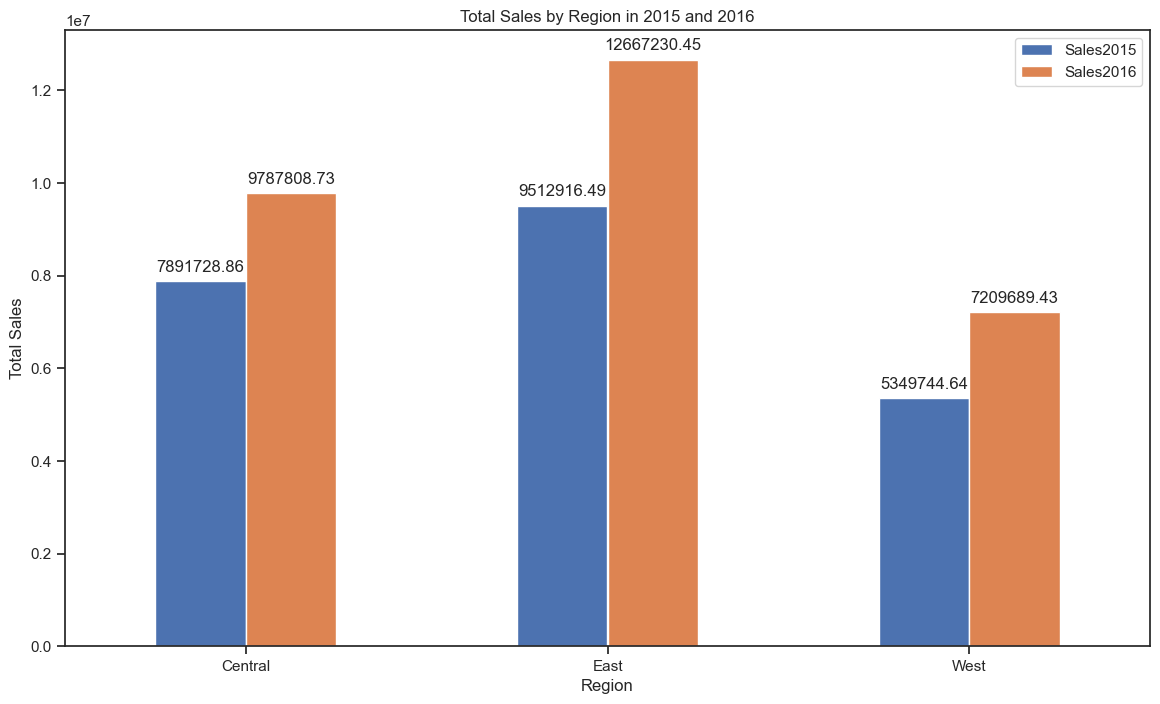

In [7]:
ax = sales_data.groupby('Region')[['Sales2015', 'Sales2016']].sum().plot(kind='bar', figsize = (14,8))
plt.title('Total Sales by Region in 2015 and 2016')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Add labels to the top of each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()


## 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [94]:
data1 = sales_data.groupby('Region')[['Sales2016']].sum()
data1

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


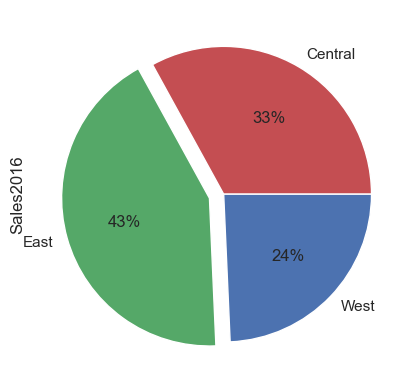

In [95]:
data1.plot(kind = 'pie', subplots = True, autopct="%1.0f%%", explode=[0.0,0.1,0.0], colors=['r', 'g', 'b'], legend = None)
plt.show()

## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

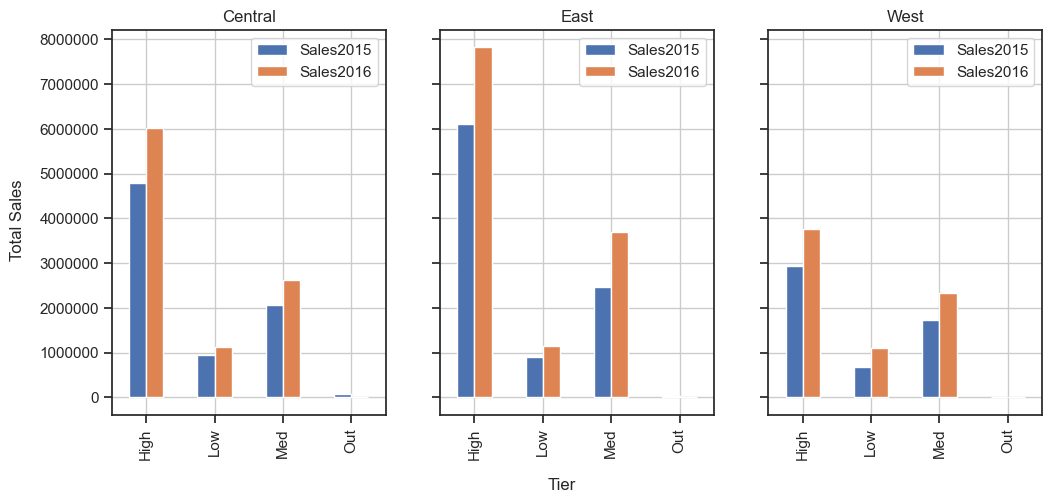

In [10]:
sales_by_region_tier = sales_data.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), sharey=True)

sales_by_region_tier.loc['Central'].plot(kind='bar', ax=axes[0], title='Central')
sales_by_region_tier.loc['East'].plot(kind='bar', ax=axes[1], title='East')
sales_by_region_tier.loc['West'].plot(kind='bar', ax=axes[2], title='West')
for i in range(0,3):
    axes[i].set_xlabel("")
    axes[i].grid()
    
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

fig.text(0.5, -0.04, 'Tier', ha='center')
fig.text(0.04, 0.5, 'Total Sales', va='center', rotation='vertical')
plt.show()


## 4. In East region, which state registered a decline in 2016 as compared to 2015?

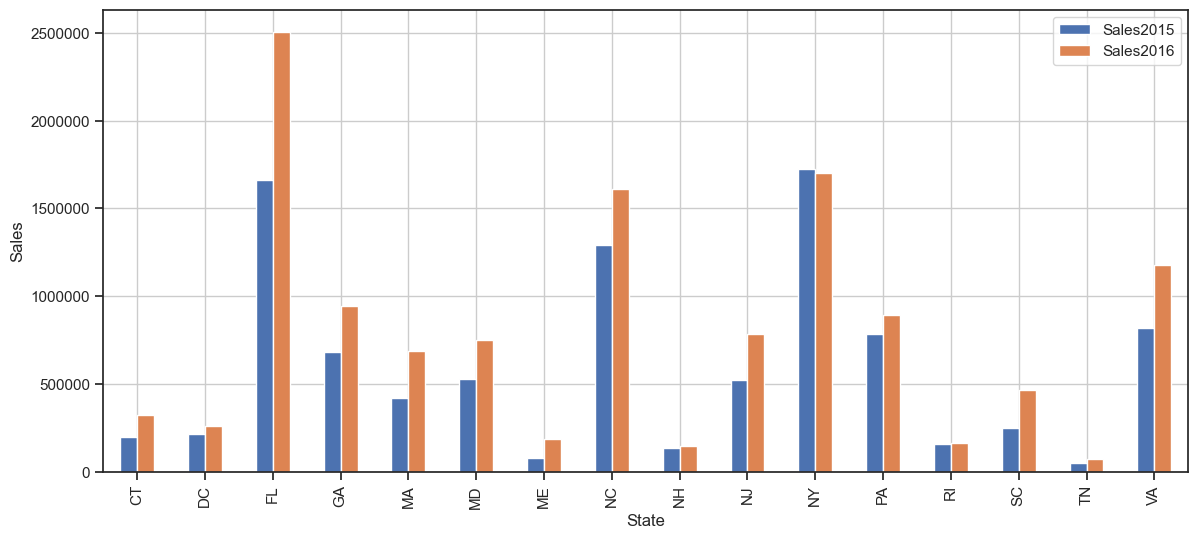

In [12]:
data1 = sales_data.loc[sales_data.Region == 'East'].groupby(['State'])[['Sales2015', 'Sales2016']].sum().plot(kind = 'bar', figsize = (14,6))
plt.ylabel("Sales")
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.show()

###  In East region, 'NY' state registered a decline in Sales in 2016 as compared to that of 2015.

## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

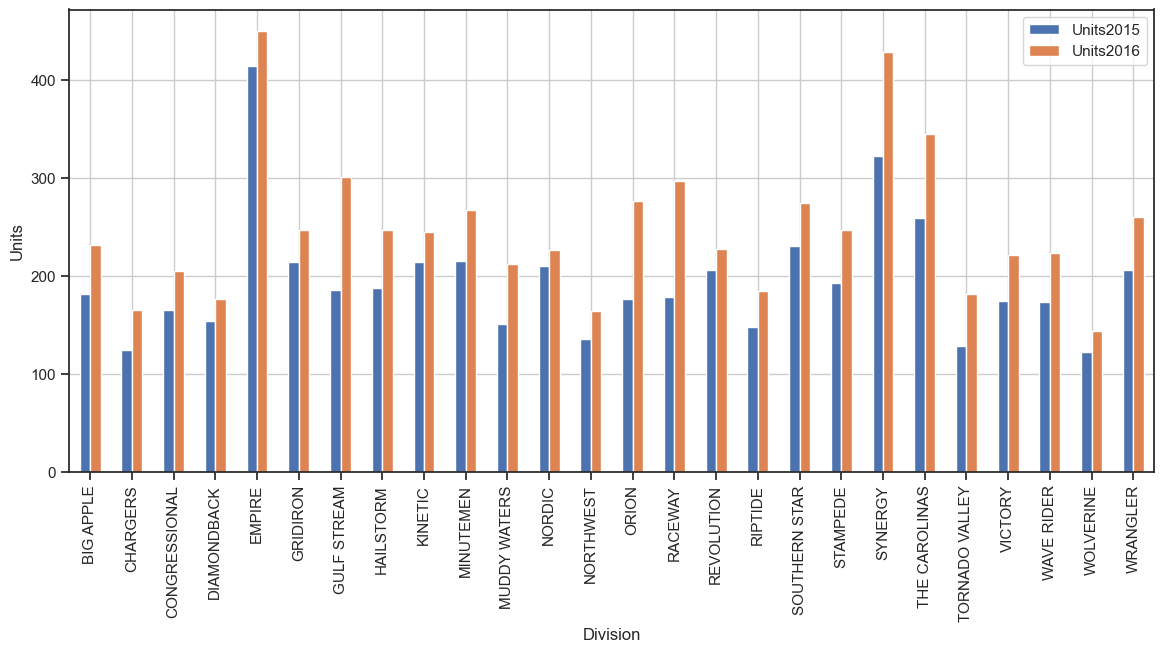

In [13]:
data2 = sales_data.loc[sales_data.Tier == 'High'].groupby(['Division'])[['Units2015', 'Units2016']].sum().plot(kind = 'bar', figsize = (14,6))
plt.ylabel("Units")
plt.grid(True)
plt.show()

### In all the High tier, 'No' Division saw a decline in number of units sold in 2016 compared to 2015?

## 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### • Jan - Mar : Q1
### • Apr - Jun : Q2
### • Jul - Sep : Q3
### • Oct - Dec : Q4 

In [14]:
sales_data['Qtr'] = np.where(sales_data['Month'].isin(['Jan', 'Feb', 'Mar']), 'Q1',
                    np.where(sales_data['Month'].isin(['Apr', 'May', 'Jun']), 'Q2',
                    np.where(sales_data['Month'].isin(['Jul', 'Aug', 'Sep']), 'Q3',
                    'Q4')))

In [15]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


## 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

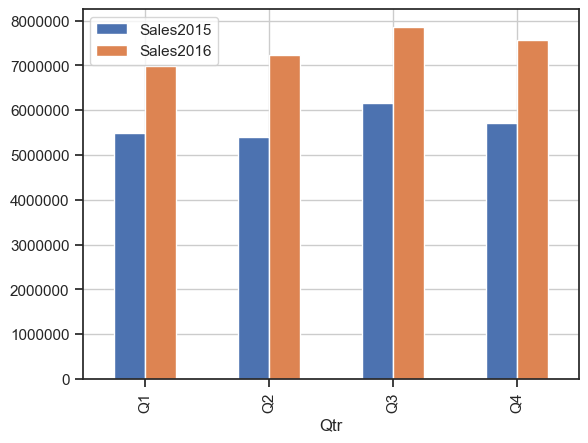

In [16]:
sales_data.groupby("Qtr")[['Sales2015', 'Sales2016']].sum().plot(kind = 'bar')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.show()

## 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. (Draw 4 pie charts representing a Quarter for each Tier)

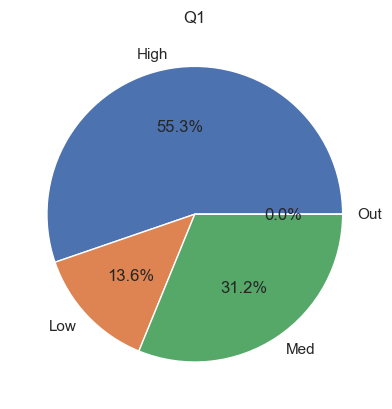

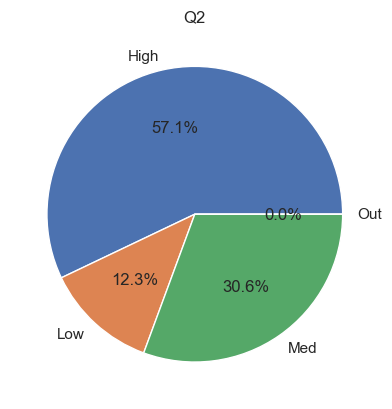

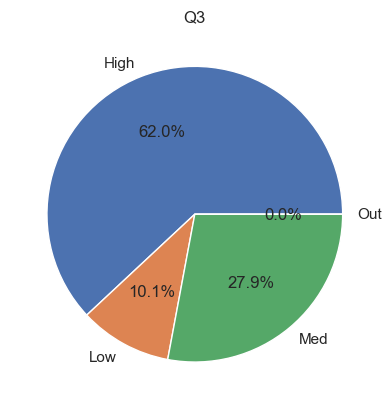

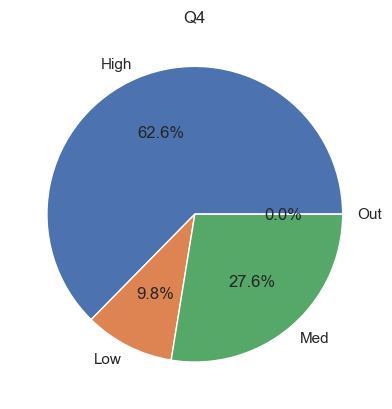

In [17]:
sales_data.drop(sales_data.loc[(sales_data.Tier == 'Out') & (sales_data.Sales2016 < 0)].index, inplace = True)
sales_by_qtr_tier = sales_data.groupby(['Qtr', 'Tier'])['Sales2016'].sum().unstack()

for qtr in ['Q1', 'Q2', 'Q3', 'Q4']:
    fig, ax = plt.subplots()
    ax.pie(sales_by_qtr_tier.loc[qtr], labels = sales_by_qtr_tier.columns, autopct='%1.1f%%')
    ax.set_title(qtr)
    plt.show()